In [1]:
import pandas as pd
import numpy as np

In [2]:
x = [*range(2,102,2)] # range is an iterator
                                        # M/D/Y
y = pd.date_range(start='1/1/15',end = '2/1/19', freq = 'MS')
df = pd.DataFrame({'num':x, 'date':y})


In [3]:
df.head()

,num,date
0,2,2015-01-01
1,4,2015-02-01
2,6,2015-03-01
3,8,2015-04-01
4,10,2015-05-01


In [4]:
df.set_index('date',inplace=True)

In [12]:
df.columns = ['x']
df['y'] = df.x * 4
df.head()

,x,y
date,,
2015-01-01,2,8
2015-02-01,4,16
2015-03-01,6,24
2015-04-01,8,32
2015-05-01,10,40


### Instead of taking correlation of two timeseries you can calculate its change in percentage of both time series data

`df.series.pct_change()`

1. perform first pct_change()
2. Then find correlation between them.

$[\operatorname{corr}(x, y)]^{2}=R^{2}$ (or R-squared)

$\operatorname{sign}(\operatorname{corr})=\operatorname{sign}(\text { regression slope })$

In last example:

o R-Squared $=0.753$

o Slope is positive

\[
\text { correlation }=+\sqrt{0.753}=0.868
\]

In [17]:
# Import the statsmodels module
import statsmodels.api as sm

In [18]:
# Compute correlation of x and y
correlation = df.x.corr(df.y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(df.x.values, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is 1.00


C:\Users\GirrajJangid\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


TypeError: invalid type promotion

## Auto-Correlation
It is the correlation of a time series with a lagged copy of itself.

Lag-one autocorrelation also called **serial correlation**

In [19]:
# Convert the daily data to weekly data
df2 = df.resample(rule='W', how='last')

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


In [20]:
df.head() # right now it is divided according to 1 month distance

,x,y
date,,
2015-01-01,2,8
2015-02-01,4,16
2015-03-01,6,24
2015-04-01,8,32
2015-05-01,10,40


In [21]:
df2.head() # we break 1 month sample into week samples

,x,y
date,,
2015-01-04,2.0,8.0
2015-01-11,NaN,NaN
2015-01-18,NaN,NaN
2015-01-25,NaN,NaN
2015-02-01,4.0,16.0


In [22]:
# Compute the percentage change of prices
df2_returns = df2.pct_change()
df2.head(10)

,x,y
date,,
2015-01-04,2.0,8.0
2015-01-11,NaN,NaN
2015-01-18,NaN,NaN
2015-01-25,NaN,NaN
2015-02-01,4.0,16.0
2015-02-08,NaN,NaN
2015-02-15,NaN,NaN
2015-02-22,NaN,NaN
2015-03-01,6.0,24.0


In [24]:
# Compute and print the autocorrelation of returns
autocorrelation = df2_returns.x.autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.06


In [29]:
df2.pct_change().x.autocorr()

-0.09116185033923303

In [31]:
df.diff()['x'].autocorr()

nan

In [40]:
df.diff()['x'].head() # difference first value with its previousj value

date
2015-01-01    NaN
2015-02-01    2.0
2015-03-01    2.0
2015-04-01    2.0
2015-05-01    2.0
Name: x, dtype: float64

In [61]:
# Compute the daily change in interest rates 
# It is the difference between next to previous value
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
# auto correlation also called lag-out relation
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()
#13853
# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

,num
date,
2015-01-04,NaN
2015-01-11,NaN
2015-01-18,NaN
2015-01-25,NaN
2015-02-01,NaN
...,...
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN


# Autocorrelation Function (ACF): The autocorrelation function as a function of the lag

In [41]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [46]:
import matplotlib.pyplot as plt

In [48]:
acf_array = acf(df.x)
print(acf_array)

[ 1.          0.94        0.88009604  0.82038415  0.76096038  0.70192077
  0.64336134  0.58537815  0.52806723  0.47152461  0.41584634  0.36112845
  0.30746699  0.25495798  0.20369748  0.15378151  0.10530612  0.05836735
  0.01306122 -0.03051621 -0.07226891 -0.11210084 -0.14991597 -0.18561825
 -0.21911164 -0.25030012 -0.27908764 -0.30537815 -0.32907563 -0.35008403
 -0.36830732 -0.38364946 -0.39601441 -0.40530612 -0.41142857 -0.41428571
 -0.41378151 -0.40981993 -0.40230492 -0.39114046 -0.37623049]


C:\Users\GirrajJangid\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [1]:
zx

NameError: name 'zx' is not defined

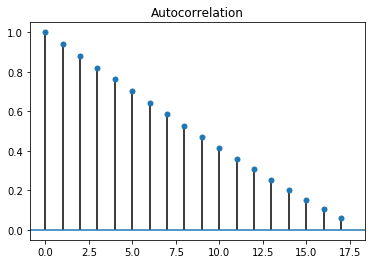

In [50]:
# Plot the acf function
plot_acf(df.x, alpha=1)
plt.show()

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

The autocorrelation of weekly MSFT returns is 1.00
The approximate confidence interval is +/- 0.28


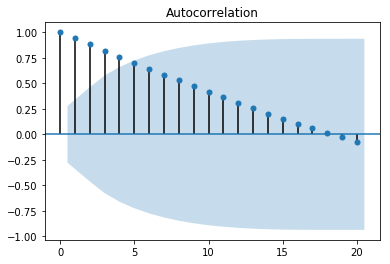

In [69]:
# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = df.x.autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(df)

# Compute the approximate confidence interval
conf = 1.96/np.sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(df.y, alpha=0.05, lags=20)
plt.show()

#  White Noise
It is a series with:
1. Constant mean
2. Constant variance
3. zero autocorrelation at all lags

Special case: If data has normal distribution, then **Gaussian White Noise**


###### Autocorrelation of white noise series is zero

The mean is 0.019 and the standard deviation is 0.048


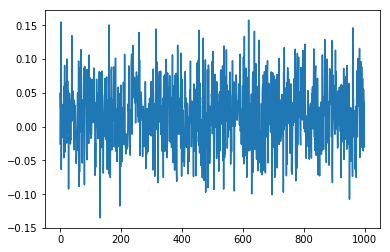

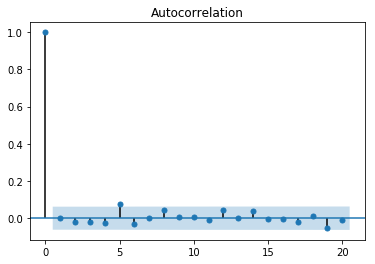

In [70]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

# What is Random walk?

1. Today's price = yesterday price + Noise

pt = p(t-1)  + et

2. change in price is white noise

pt - p(t-1) = et


3. Can't forecast a random walk
4. Best forecast for tomorrow's price is today's price
5. Random walk with drift

pt = u + p(t-1) + et

6. Change in price is white noise with non-zero mean:

pt - p(t-1) = u + et


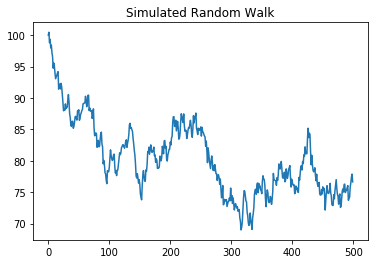

In [76]:
steps = np.random.normal(loc=0, scale=1, size=500)

steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

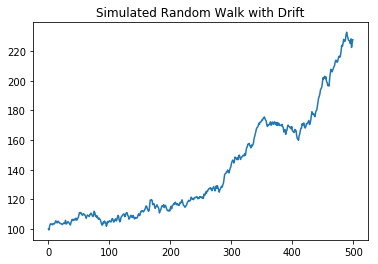

In [85]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")

plt.show()

In [86]:
# Dicky fuller testing
# If the P-value is less than 5% then we reject null hypothesis
# null hypothesis ==> distribition has random walk
# alternative hypothesis ==> distribution has not random walk
#a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.


# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

In [90]:
# Run the ADF test on the price series and print out the results
# Augmented Dickey-fuller test
results = adfuller(P)
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

# results[0] test statistics
# resutls[1] p values

(2.1960673958872765, 0.9988792536489209, 1, 498, {'1%': -3.4435494520411605, '5%': -2.8673612117611267, '10%': -2.5698704830567247}, 1668.3326969640823)
The p-value of the test on prices is: 0.9988792536489209


In [99]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Eliminate the NaN in the first row of returns
P_ret = pd.DataFrame(P).pct_change().dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(P_ret[0])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 0.0


# What is stationarity?

**Strong Stationarity** : Entire distribution of data is time-invarient (do not depends on time)

**Weak Stationarity** : Mean, variance, and auto correlation are time- invarient(i.e., for autocorrelation,
corr(Xt, Xt-tow) is only a function of tow)

## If the process is not stationary it create problem.
#### Why do we care?

1. If parameters vary with time, too many parameters to estimate
2. Can only estimate a parsimonious model with a few parameters

#### Random walk is a kind of example of Nonstationary Series

variance grown with time

##### Seasonal series also Nonstationary Series

##### change in mean, std with time also nonstationary series

##### A series called stationary if its statistical property is constant with time.

##### When everything is constant we called them a WHITE NOISE

**Seasonality** is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly.